In [122]:
def rename_columns(df, name):
    df.columns=['date', name, 'nan']
    df['date']=pd.to_datetime(df['date'])
    
    return df[['date', name]]

import pandas as pd
import numpy as np


df_fed=rename_columns(pd.read_csv("us聯邦基金利率.csv", encoding='big5'), 'FedRate')#美國聯邦基金利率
df_cpi=rename_columns(pd.read_csv("usCPI年增率.csv", encoding='big5'), 'CPI')#美國CPI年增率
df_corecpi=rename_columns(pd.read_csv("us核心CPI年增率.csv", encoding='big5'), 'CoreCPI')#美國CoreCPI年增率
df_nonfarm=rename_columns(pd.read_csv("us非農就業人數變化.csv", encoding='big5'), 'NonfarmPayrolls')#美國非農就業數據（Nonfarm Payrolls）

dfs=pd.merge(pd.merge(df_nonfarm, df_fed, on='date', how='left'), \
             pd.merge(df_cpi,df_corecpi, on='date', how='left'))

df_dji=pd.read_csv("DJI.csv")
df_dji=df_dji[["Date", "Price"]]
df_dji.columns=["date", "DJI"]
df_dji['date']=pd.to_datetime(df_dji['date'])
df_dji.sort_values("date", inplace=True)
df_dji['DJI']=df_dji['DJI'].str.replace(",", '').astype(float)

dfs=pd.merge(dfs, df_dji, on='date', how='left')

dfs=dfs[(dfs['date']>="2005")]
dfs.set_index('date', inplace=True)
dfs=dfs.ffill()
dfs

,NonfarmPayrolls,FedRate,CPI,CoreCPI,DJI
date,,,,,
2005-01-01,150.0,2.25,3.0,2.3,NaN
2005-02-01,258.0,2.50,3.0,2.4,10551.94
2005-03-01,124.0,2.75,3.1,2.3,10830.00
2005-04-01,362.0,2.75,3.5,2.2,10404.30
2005-05-01,172.0,3.00,2.8,2.2,10404.30
...,...,...,...,...,...
2023-03-01,217.0,5.00,5.0,5.6,27347.36
2023-04-01,217.0,5.00,4.9,5.5,27347.36
2023-05-01,281.0,5.25,4.0,5.3,27347.36


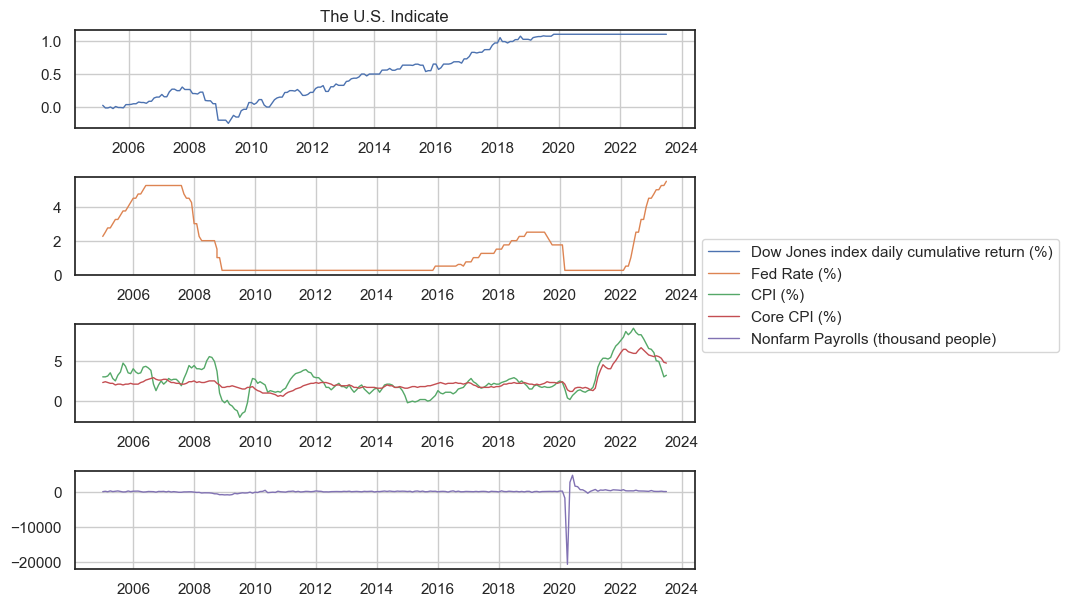

In [123]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(8, 7))  # 3 rows, 1 column

#DJI
line0,=axs[0].plot(dfs['DJI'].pct_change().cumsum(), label="Dow Jones index daily cumulative return (%)", linewidth=1, color='C0')
axs[0].set_title('The U.S. Indicate')
axs[0].grid(axis='both')

#fed
line1,=axs[1].plot(dfs['FedRate'], label="Fed Rate (%)", linewidth=1, color='C1')
axs[1].grid(axis='both')

#cpi
line2, =axs[2].plot(dfs['CPI'], label='CPI (%)', linewidth=1, color='C2')
line3, =axs[2].plot(dfs['CoreCPI'], label='Core CPI (%)', linewidth=1, color='C3')
axs[2].grid(axis='both')

#nonfarm
line4, =axs[3].plot(dfs['NonfarmPayrolls'], label="Nonfarm Payrolls (thousand people)" , linewidth=1, color='C4')
axs[3].grid(axis='both')


# Collect handles and labels from each subplot's legend
handles = [line0, line1, line2, line3, line4]
labels = [h.get_label() for h in handles]
# Create a single legend outside of subplots
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.9, 0.5))

plt.subplots_adjust(hspace=0.5) # Adjust the vertical spacing between subplots

plt.savefig("us_indicate.png" ,bbox_inches='tight')
plt.show()

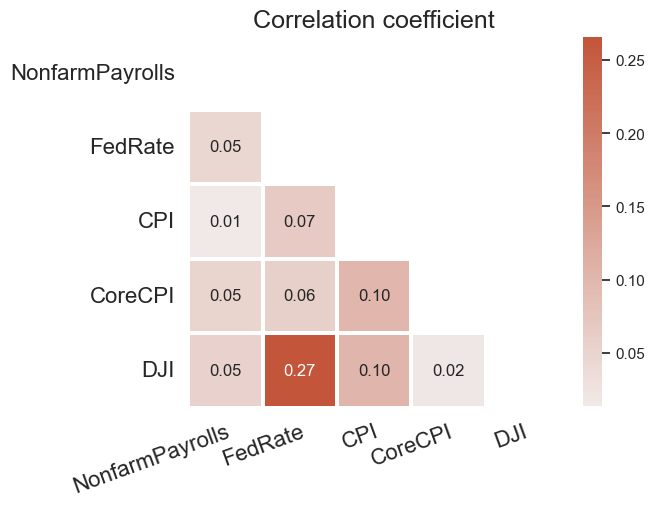

In [124]:
import seaborn as sns

sns.set_theme(style="white")

corr = dfs.pct_change().corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(6, 6))

ax.set_title(f'Correlation coefficient', fontsize=18)

ax.tick_params(labelsize=16)

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
        square=True, linewidths=1.5, cbar_kws={"shrink": 0.8}, 
        annot = True ,annot_kws={"size": 12}, fmt='.2f')

plt.setp(ax.get_xticklabels(), rotation=20, ha="right", rotation_mode="anchor")

plt.savefig("correlation.png" ,bbox_inches='tight')
plt.show()

In [125]:
api = DataLoader()
# api.login_by_token(api_token='token')
# api.login(user_id='user_id',password='password')
df = api.taiwan_stock_daily(
    stock_id='2330',
    start_date='2020-04-02',
    end_date='2020-04-12'
)

NameError: name 'DataLoader' is not defined